In [7]:
#import libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [8]:
#load file
from google.colab import files
uploaded = files.upload() 

Saving email_dataset.csv to email_dataset.csv


In [67]:
#read file
df = pd.read_csv('email_dataset.csv')

#print first 5 rows
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    5726 non-null   object 
 1   spam    5726 non-null   float64
dtypes: float64(1), object(1)
memory usage: 89.7+ KB


In [69]:
df['spam'].value_counts()

0.0    4359
1.0    1367
Name: spam, dtype: int64

In [70]:
#check for empty cells
df.isnull().sum()

text    4
spam    4
dtype: int64

In [71]:
#drop empty cells
df.dropna(axis=0, how='any', inplace = True)

#check for empty cells
df.isnull().sum()

text    0
spam    0
dtype: int64

In [72]:
df['spam'] = df['spam'].astype('int')

In [73]:
#initial shape of dataset
print(df.info())

df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5726 non-null   object
 1   spam    5726 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.2+ KB
None


(5726, 2)

In [74]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [75]:
#check for duplicates
print(df.duplicated().sum())

33


In [76]:
#remove duplicates
df.drop_duplicates(inplace = True)

#new shape of dataset
df.shape

(5693, 2)

In [77]:
#download stopwords packages
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
def process_text(text):
#removing puntuations
                  
                       nopunc = [char for char in text if char not in string.punctuation]
                       nopunc = ''.join(nopunc)
#removing stopwords

                       clean_words = [word for word in nopunc.split() if word.lower not in stopwords.words('english')]
#return list of clean words

                       return clean_words

In [79]:
#separating text with commas(tokens)

df['text'].head().apply(process_text)

0    [Subject, naturally, irresistible, your, corpo...
1    [Subject, the, stock, trading, gunslinger, fan...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, do, not, have, money, get, software,...
Name: text, dtype: object

In [80]:
#text to matrix

message4 = 'hello world hello hello world play'
message5 = 'test test test test one hello'
print(message4)
print()

from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer=process_text).fit_transform([[message4],[message5]])
print(bow4)

hello world hello hello world play

  (0, 0)	3
  (0, 4)	2
  (0, 2)	1
  (1, 0)	1
  (1, 3)	4
  (1, 1)	1


In [81]:
#conv colln of text to matrix

from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

In [82]:
#get shape of messages_bow

messages_bow.shape

(5693, 37254)

In [83]:
#split data into 80% training 20% testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(messages_bow, df['spam'], test_size = 0.20, random_state = 0)

In [84]:
# check for data balance
print(y_train.value_counts())
print(y_test.value_counts())

0    3457
1    1097
Name: spam, dtype: int64
0    869
1    270
Name: spam, dtype: int64


In [85]:
#SMOTE - for balancing data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)
X_test_res, y_test_res = sm.fit_resample(x_test, y_test)


In [86]:
print(y_train_res.value_counts())
print(y_test_res.value_counts())

0    3457
1    3457
Name: spam, dtype: int64
0    869
1    869
Name: spam, dtype: int64


In [87]:
#create and train logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(X_train_res, y_train_res)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# predict test data
pred = classifier.predict(X_test_res)

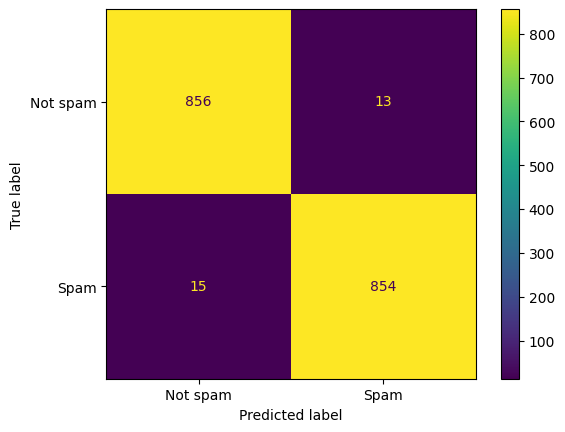

In [89]:
#evaluting model with test data set(test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test_res, pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=["Not spam", "Spam"])
disp.plot()

In [90]:
print(classification_report(y_test_res, pred))
print()
print('accuracy: ', accuracy_score(y_test_res, pred))
print('precision_score: ', precision_score(y_test_res, pred))
print('recall_score: ', precision_score(y_test_res, pred))
print('f1-score: ', precision_score(y_test_res, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       869
           1       0.99      0.98      0.98       869

    accuracy                           0.98      1738
   macro avg       0.98      0.98      0.98      1738
weighted avg       0.98      0.98      0.98      1738


accuracy:  0.9838895281933256
precision_score:  0.9850057670126874
recall_score:  0.9850057670126874
f1-score:  0.9850057670126874


In [91]:
#create and train decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier().fit(X_train_res, y_train_res)

In [92]:
# predict test data
pred = classifier.predict(X_test_res)

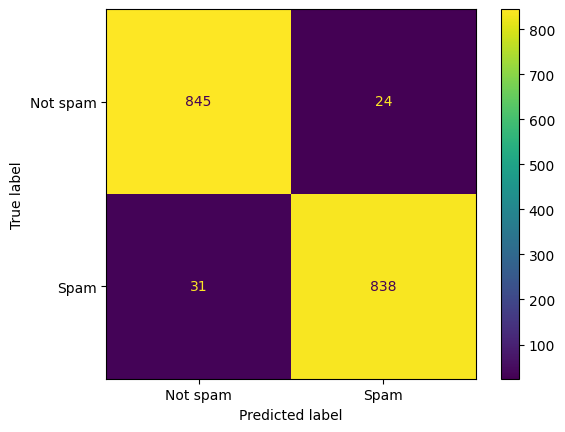

In [93]:
#evaluting model with test data set(test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_res, pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=["Not spam", "Spam"])
disp.plot()

In [94]:
print(classification_report(y_test_res, pred))
print()
print('accuracy: ', accuracy_score(y_test_res, pred))
print('precision_score: ', precision_score(y_test_res, pred))
print('recall_score: ', precision_score(y_test_res, pred))
print('f1-score: ', precision_score(y_test_res, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       869
           1       0.97      0.96      0.97       869

    accuracy                           0.97      1738
   macro avg       0.97      0.97      0.97      1738
weighted avg       0.97      0.97      0.97      1738


accuracy:  0.9683544303797469
precision_score:  0.9721577726218097
recall_score:  0.9721577726218097
f1-score:  0.9721577726218097


In [95]:
#create and train of Naive Bayes classifers
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train_res, y_train_res)

In [96]:
# predict test data
pred = classifier.predict(X_test_res)

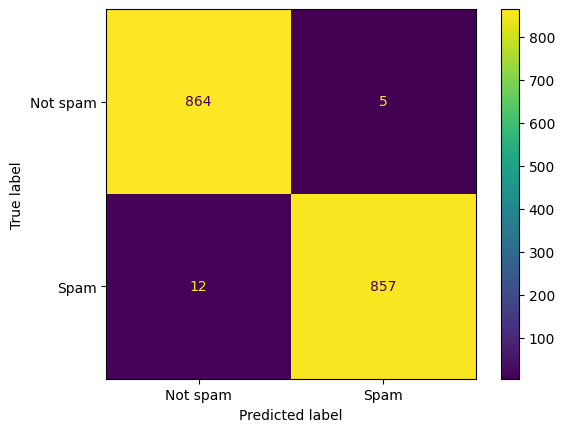

In [97]:
#evaluting model with test data set(test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_res, pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=["Not spam", "Spam"])
disp.plot()

In [98]:
print(classification_report(y_test_res, pred))
print()
print('accuracy: ', accuracy_score(y_test_res, pred))
print('precision_score: ', precision_score(y_test_res, pred))
print('recall_score: ', precision_score(y_test_res, pred))
print('f1-score: ', precision_score(y_test_res, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       869
           1       0.99      0.99      0.99       869

    accuracy                           0.99      1738
   macro avg       0.99      0.99      0.99      1738
weighted avg       0.99      0.99      0.99      1738


accuracy:  0.9902186421173763
precision_score:  0.994199535962877
recall_score:  0.994199535962877
f1-score:  0.994199535962877


In [99]:
# create and train Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_res, y_train_res)

In [100]:
# predict test data
pred = classifier.predict(X_test_res)

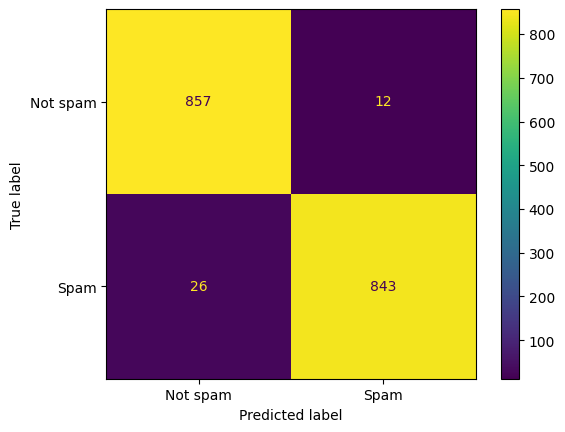

In [101]:
#evaluting model with test data set(test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_res, pred)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=["Not spam", "Spam"])
disp.plot()

In [102]:
print(classification_report(y_test_res, pred))
print()
print('accuracy: ', accuracy_score(y_test_res, pred))
print('precision_score: ', precision_score(y_test_res, pred))
print('recall_score: ', precision_score(y_test_res, pred))
print('f1-score: ', precision_score(y_test_res, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       869
           1       0.99      0.97      0.98       869

    accuracy                           0.98      1738
   macro avg       0.98      0.98      0.98      1738
weighted avg       0.98      0.98      0.98      1738


accuracy:  0.9781357882623706
precision_score:  0.9859649122807017
recall_score:  0.9859649122807017
f1-score:  0.9859649122807017


In [103]:
# Plotting AUC curves models
def plot_auc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'k--')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


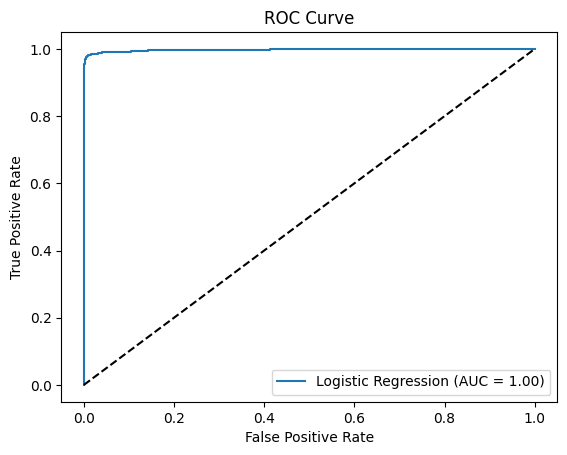

In [104]:
# Logistic Regression
classifier = LogisticRegression().fit(X_train_res, y_train_res)
y_pred_proba = classifier.predict_proba(X_test_res)[:, 1]
plot_auc_curve(y_test_res, y_pred_proba, "Logistic Regression")

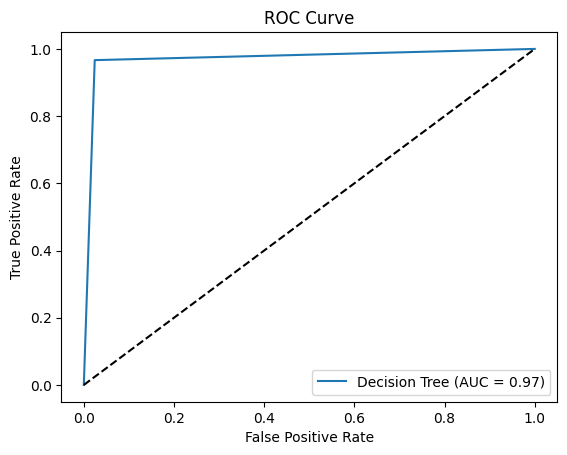

In [105]:
# Decision Tree
classifier = DecisionTreeClassifier().fit(X_train_res, y_train_res)
y_pred_proba = classifier.predict_proba(X_test_res)[:, 1]
plot_auc_curve(y_test_res, y_pred_proba, "Decision Tree")

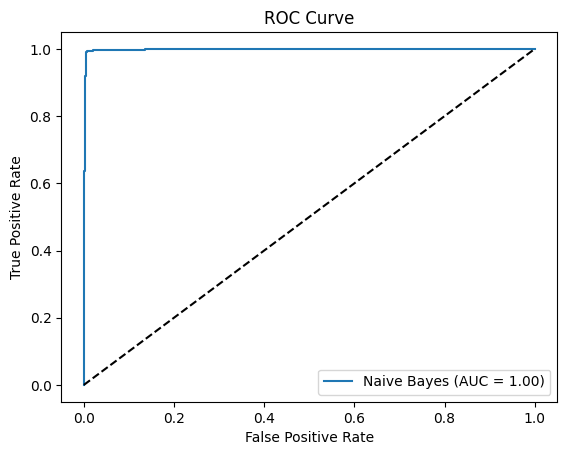

In [106]:
# Naive Bayes
classifier = MultinomialNB().fit(X_train_res, y_train_res)
y_pred_proba = classifier.predict_proba(X_test_res)[:, 1]
plot_auc_curve(y_test_res, y_pred_proba, "Naive Bayes")

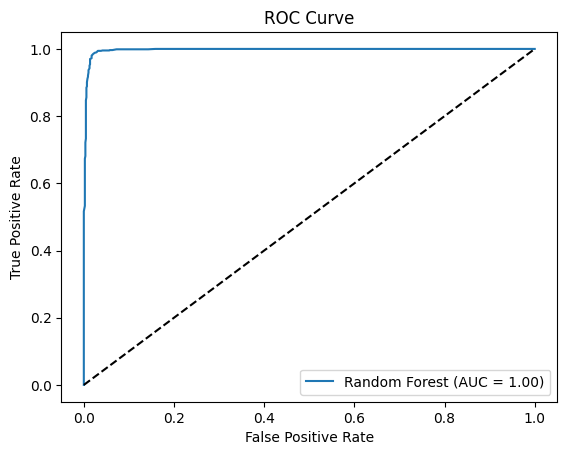

In [107]:
# Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_res, y_train_res)
y_pred_proba = classifier.predict_proba(X_test_res)[:, 1]
plot_auc_curve(y_test_res, y_pred_proba, "Random Forest")

In [108]:
# Plotting Combined Curve
def plot_combined_auc_curve(y_test, classifiers, classifier_names):
    plt.figure()
    for clf, clf_name in zip(classifiers, classifier_names):
        y_pred_proba = clf.predict_proba(X_test_res)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{clf_name} (AUC = {auc:.2f})")
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

In [109]:
# Train all classifiers
logistic_regression_clf = LogisticRegression().fit(X_train_res, y_train_res)
decision_tree_clf = DecisionTreeClassifier().fit(X_train_res, y_train_res)
naive_bayes_clf = MultinomialNB().fit(X_train_res, y_train_res)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_res, y_train_res)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


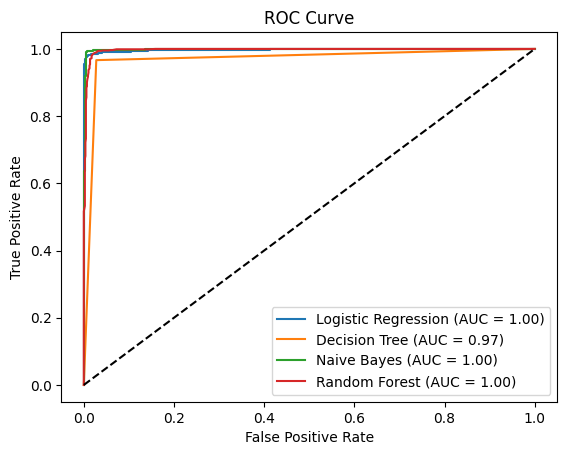

In [110]:
# Plot AUC curves for all classifiers
classifiers = [logistic_regression_clf, decision_tree_clf, naive_bayes_clf, random_forest_clf]
classifier_names = ["Logistic Regression", "Decision Tree", "Naive Bayes", "Random Forest"]
plot_combined_auc_curve(y_test_res, classifiers, classifier_names)